# Gate Fidelity, Basics and Definitions
 by: Richard Kienhoefer

### Definition
For quantum computing, fidelity is how close two quantum states are to each other. In other words, fidelity asks how close is state two from state one. This is also very closely related to noise and attempting to reduce noise. Typically you compare the difference between an ideal output with experimental output results.

The original statistical definition of fidelity was given by:
> $F(X,Y)=( \sum_{i} \sqrt{p_i q_i} )^2$

Where p and q are probabilities. <br>
But because we are dealing with quantum states these probabilities are going to be matricies. We call these matricies $\rho$ and $\sigma$. <br>
Our quantum fidelity now becomes (derivation is left to the reader):
> $F(\rho,\sigma)=( tr \sqrt{ \sqrt{\rho} \sigma \sqrt{\rho}} )^2$

### Trace 
The tr() from above stands for trace. Trace is the sum of all the diagonal elements of a matrix.

> $ tr(A) = \sum_{i=1}^{n}a_{ii} = a_{11} + a_{22} + [...] + a_{nn}$

### Properties
There exist a few properties the come from quantum state fidelity:
* Symmetry: $F(\sigma, \rho)=F(\rho, \sigma)$
* Bounded values: $0 \leq F(\sigma, \rho) \leq 1$ and $F(\rho, \rho)=1$
* Consistency with fidelity between probability distributions: <br>
If $\rho$ and $\sigma$ commute, the definition becomes:
> $F(\sigma, \rho)=[tr \sqrt{\sigma \rho}]^2=(\sum_k\sqrt{p_kq_k})^2=F(p, q)$
* Simplified expression for pure states: 
If $\rho$ is pure ( when $\rho = |\psi_\rho><\psi_\rho|$), then:
>$F(\rho, \sigma)=<\psi_\rho|\sigma|\psi_\rho>$
* Explicit expression for qubits: When both our $\sigma$ and $\rho$ are both qubits, the fidelity calculation changes.
> $F(\rho, \sigma)=tr(\rho\sigma)+2\sqrt{det(\rho)det(\sigma)}$

These properties create the mathematical foundation to quantum computing fidelity.

### Noise models

To explore fidelity further, we will look at the outputs of circuits. <br>
By creating a noise model, we can probe the fidelity of various models.<br>
On a real quantum computer this process would be different as the model would be based on which computer we
would be running the code on.

In [ ]:
import qiskit
from qiskit import IBMQ
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error
provider = IBMQ.load_account()

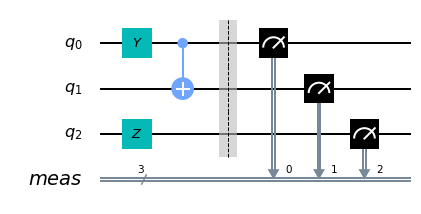

In [18]:
qc = qiskit.QuantumCircuit(3)
qc.y(0)
qc.z(2)
qc.cx(0, 1)
qc.measure_all()
qc.draw(output='mpl')

Without a noise model, the qasm simulator returns a fidelity of 100 % (8192/8192)

In [19]:
qiskit.execute( qc, qiskit.Aer.get_backend('qasm_simulator'), shots=8192).result().get_counts()

{'011': 8192}

Using IBM's Athens system, we extract the noise model and get fidelity of ~ 90% (~7400/8192)

In [21]:
backend = provider.get_backend('ibmq_athens')
noise_model = NoiseModel.from_backend(backend)
qiskit.execute( qc, qiskit.Aer.get_backend('qasm_simulator'), noise_model=noise_model, shots=8192).result().get_counts()

{'011': 7338,
 '000': 14,
 '101': 11,
 '110': 11,
 '001': 213,
 '111': 361,
 '010': 242,
 '100': 2}

### Different Architecture

Each quantum computer has a certain degree of fidelity to them. The fidelity can depend on a variety of factors, but the image below is only comparing the differences in the kind of qubit architecture and interconnections of those qubits.<br>
On the left is a trapped ion quantum computer, from the University of Maryland, with deep interconnections between the qubits. And on the right is one of IBM's superconducting quantum computers with minimal connections.<br>
The two bar graphs show the fidelity that can be acheived for each system, given the same circuit for each. The first thing that should pop out is that the trapped ion qubits have a much better fidelity than the superconducting qubits. This is partly due to ion trapped qubits having intrinsically better fidelity than superconducting qubits, the logical success rate is roughly 5% better {Popkin, 2016}. <br>

![fidelity by type](unknown.png)

### Citations
“Fidelity of Quantum States.” Wikipedia, Wikimedia Foundation, 12 Dec. 2020, en.wikipedia.org/wiki/Fidelity_of_quantum_states. 

Popkin, Gabriel. “Scientists Are Close to Building a Quantum Computer That Can Beat a Conventional One.” Science, AAAS, 26 July 2017, www.sciencemag.org/news/2016/12/scientists-are-close-building-quantum-computer-can-beat-conventional-one. 